In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [117]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Load the Dataset
df = pd.read_csv(r'Data_Train.csv')

In [119]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [120]:
#describe about the data
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [121]:
df.shape

(10683, 11)

In [122]:
#finding the null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

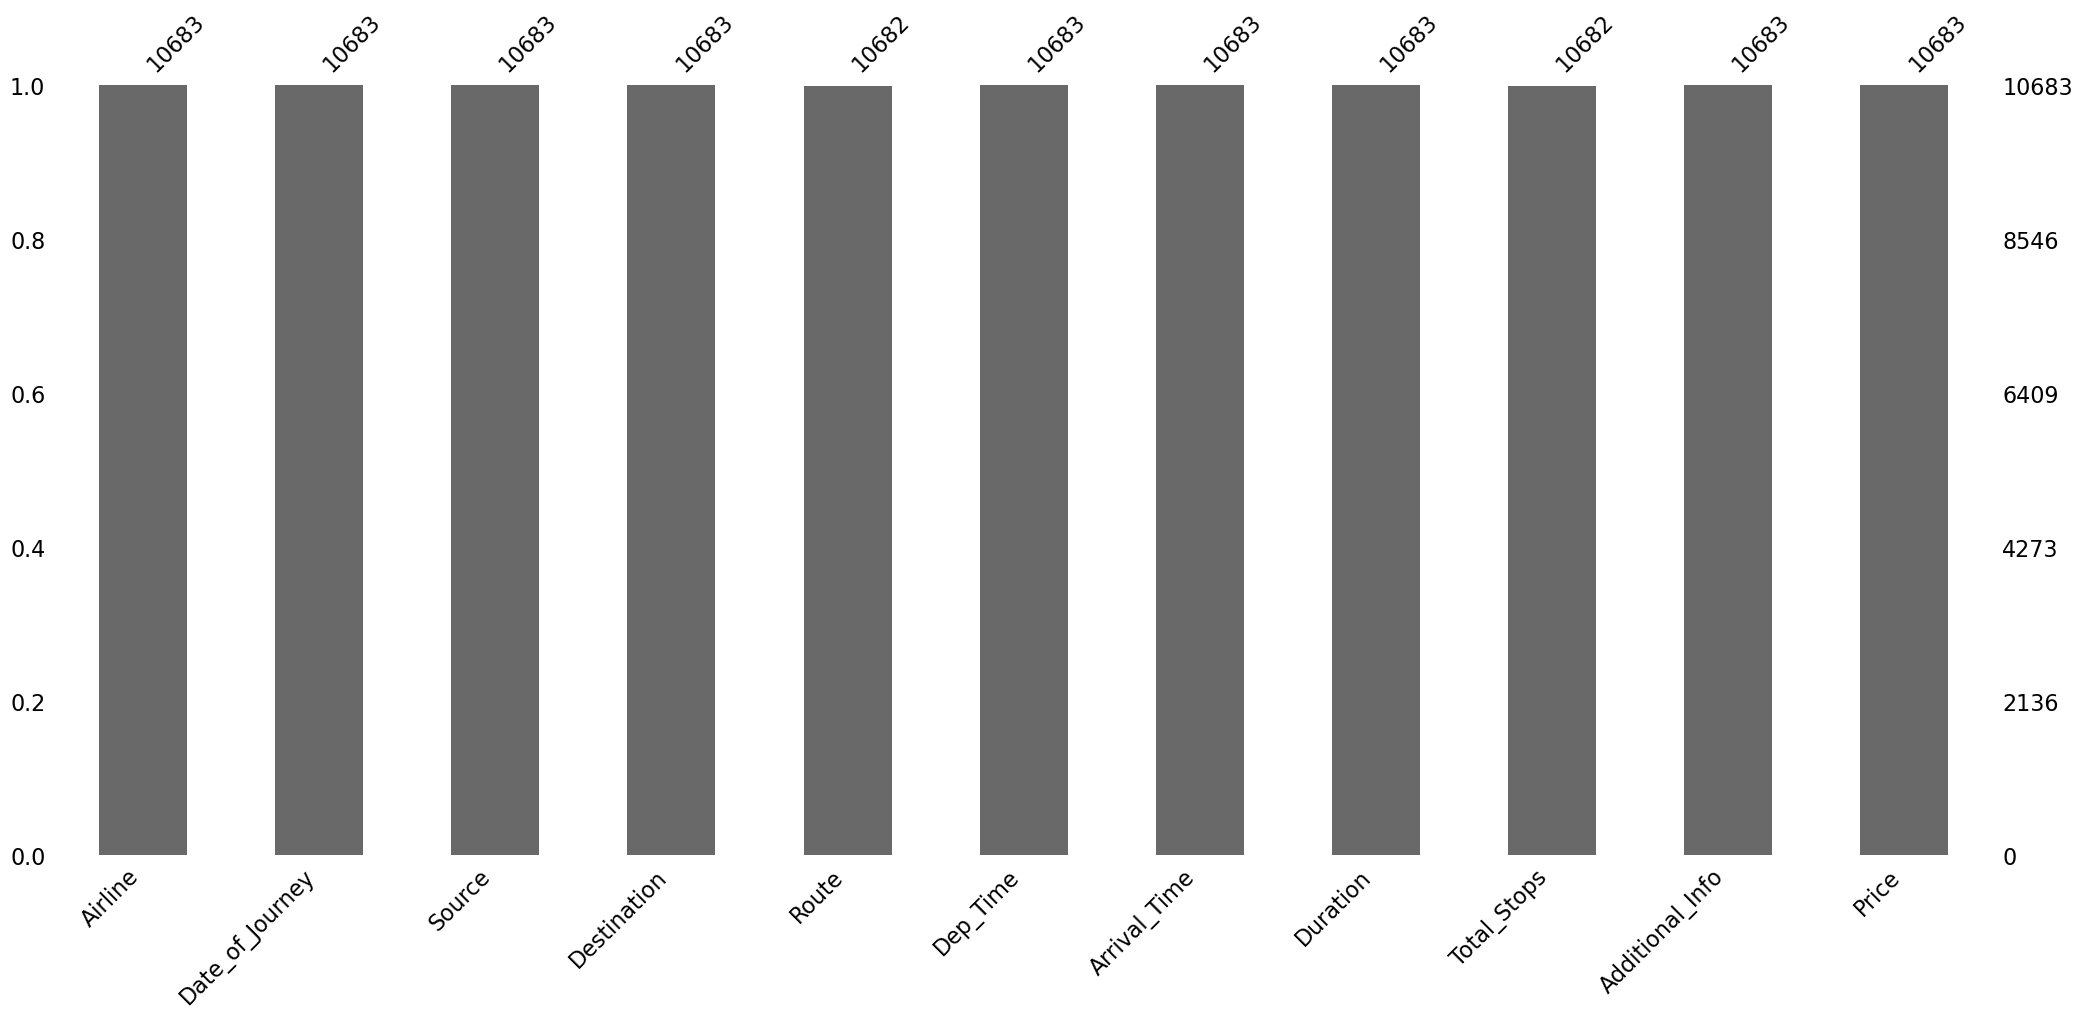

In [3]:
import missingno as msno
msno.bar(df)
plt.show

In [4]:
#drop the nullvalues
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [6]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [7]:
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])

In [8]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [10]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [11]:
df['journey_Day']=df['Date_of_Journey'].dt.day
df['journey_Month']=df['Date_of_Journey'].dt.month

In [12]:
px.histogram(data_frame=df , x = "journey_Day",text_auto=True)

In [13]:
px.histogram(data_frame=df , x = "journey_Month",text_auto=True)

In [14]:
px.histogram(data_frame=df , x ="Airline" , color="journey_Month" ,barmode='group' , text_auto=True)

In [15]:
px.histogram(data_frame=df , x ="journey_Month" ,y='Price' ,color="Airline" ,barmode='group' )

In [16]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Day,journey_Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-12-24 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-12-24 05:50:00,2024-12-24 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-12-24 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-12-24 18:05:00,2024-12-24 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-12-24 16:50:00,2024-12-24 21:35:00,4h 45m,1 stop,No info,13302,1,3


In [17]:
df.drop('Date_of_Journey', axis=1, inplace=True)

In [18]:
# function for extracting hour and minutes
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour
    
def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute

In [19]:
def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)

In [20]:
#extracting Dep_Time
extract_hour(df,'Dep_Time')
extract_min(df,'Dep_Time')

In [21]:
drop_col(df,'Dep_Time')

In [22]:
#extracting Arrival_Time
extract_hour(df,'Arrival_Time')
extract_min(df,'Arrival_Time')

In [23]:
drop_col(df,'Arrival_Time')

In [24]:
# Split Duration 
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: 
             duration[i]=duration[i] + ' 0m'
        else:
             duration[i]='0h '+ duration[i]

In [26]:
df['Duration']=duration

In [27]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_Day,journey_Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [28]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [29]:
df['dur_hour']=df['Duration'].apply(hour)

In [30]:
df['dur_min']=df['Duration'].apply(minutes)

In [31]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_Day,journey_Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [35]:
px.histogram(data_frame=df , x = "dur_hour",text_auto=True)

In [36]:
px.histogram(data_frame=df , x = "dur_min",text_auto=True)

In [37]:
drop_col(df,'Duration')

In [38]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_Day           int32
journey_Month         int32
Dep_Time_hour         int32
Dep_Time_min          int32
Arrival_Time_hour     int32
Arrival_Time_min      int32
dur_hour             object
dur_min              object
dtype: object

In [39]:
df['dur_hour'] = df['dur_hour'].astype(int)
df['dur_min'] = df['dur_min'].astype(int)

In [40]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_Day           int32
journey_Month         int32
Dep_Time_hour         int32
Dep_Time_min          int32
Arrival_Time_hour     int32
Arrival_Time_min      int32
dur_hour              int32
dur_min               int32
dtype: object

In [41]:
column=[column for column in df.columns if df[column].dtype=='object']
column

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [42]:
continuous_col =[column for column in df.columns if df[column].dtype!='object']
continuous_col

['Price',
 'journey_Day',
 'journey_Month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'dur_hour',
 'dur_min']

In [43]:
categorical = df[column]

In [44]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [45]:
categorical['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [46]:
px.histogram(data_frame=df , x = "Airline")

<Axes: xlabel='Airline', ylabel='Price'>

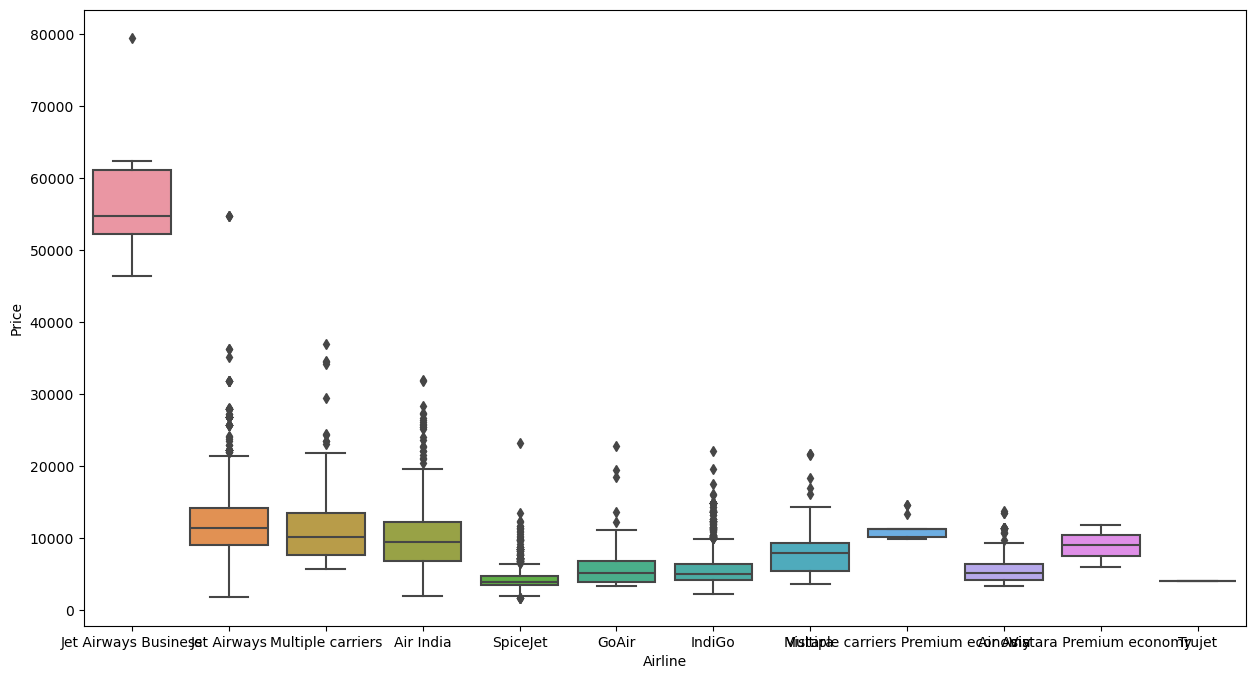

In [47]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))

In [48]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [49]:
px.histogram(data_frame=df , x = "Total_Stops",text_auto=True)

<Axes: xlabel='Total_Stops', ylabel='Price'>

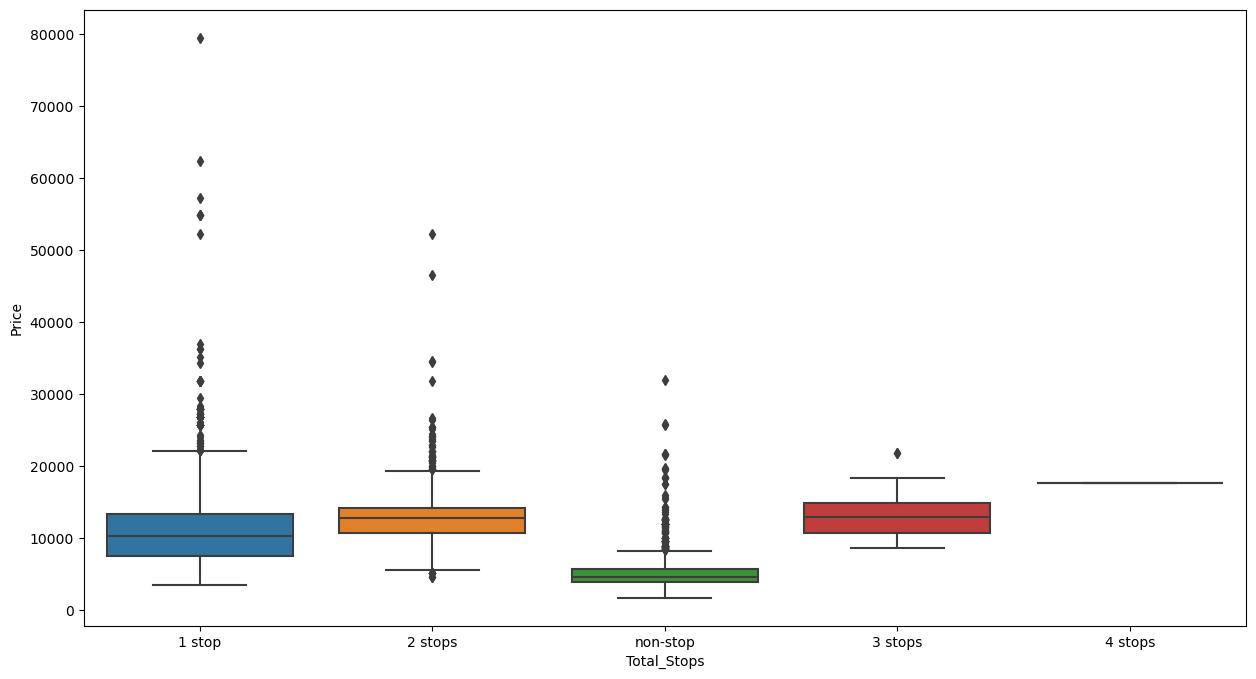

In [50]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending=False))

In [51]:
#perform OneHotEncoding
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)

In [53]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [54]:
categorical['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [55]:
px.histogram(data_frame=df , x ="Source")

<Axes: xlabel='Source', ylabel='Price'>

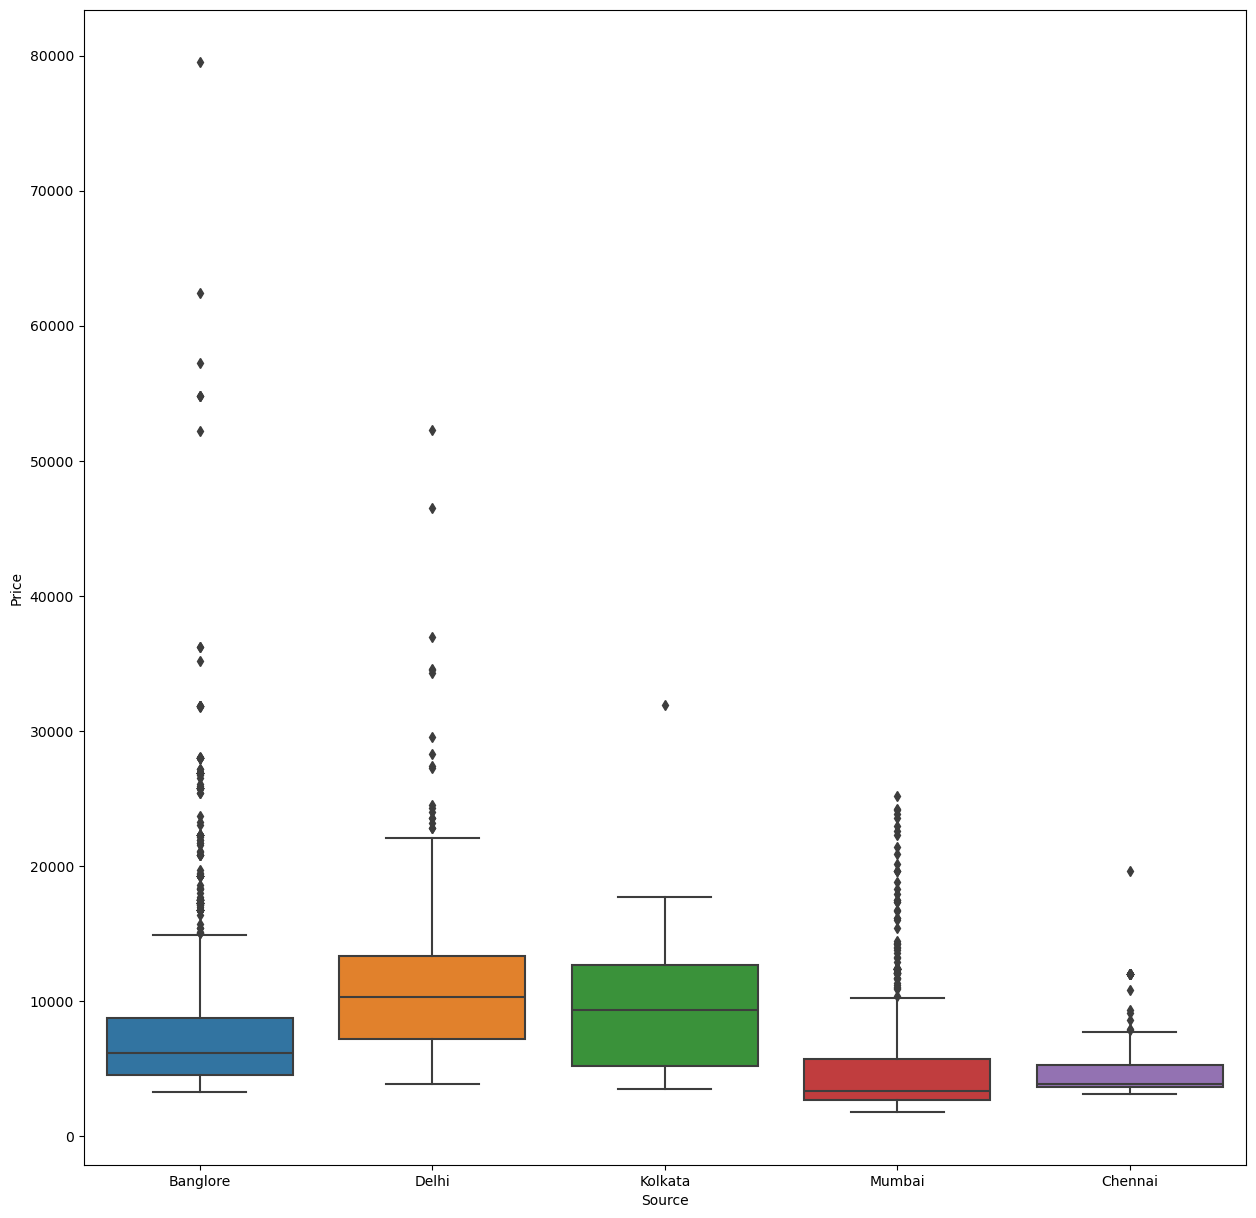

In [56]:
#Source vs Price

plt.figure(figsize=(15,15))
sns.boxplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False))


In [57]:
#encoding of source column
source=pd.get_dummies(categorical['Source'],drop_first=True)
source.head()

,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,True,False,False,False,False
1,False,False,False,True,False
2,False,False,True,False,False
3,False,False,False,True,False
4,True,False,False,False,False


In [58]:
categorical['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [59]:
px.histogram(data_frame=df , x ="Destination")

<Axes: xlabel='Destination', ylabel='Price'>

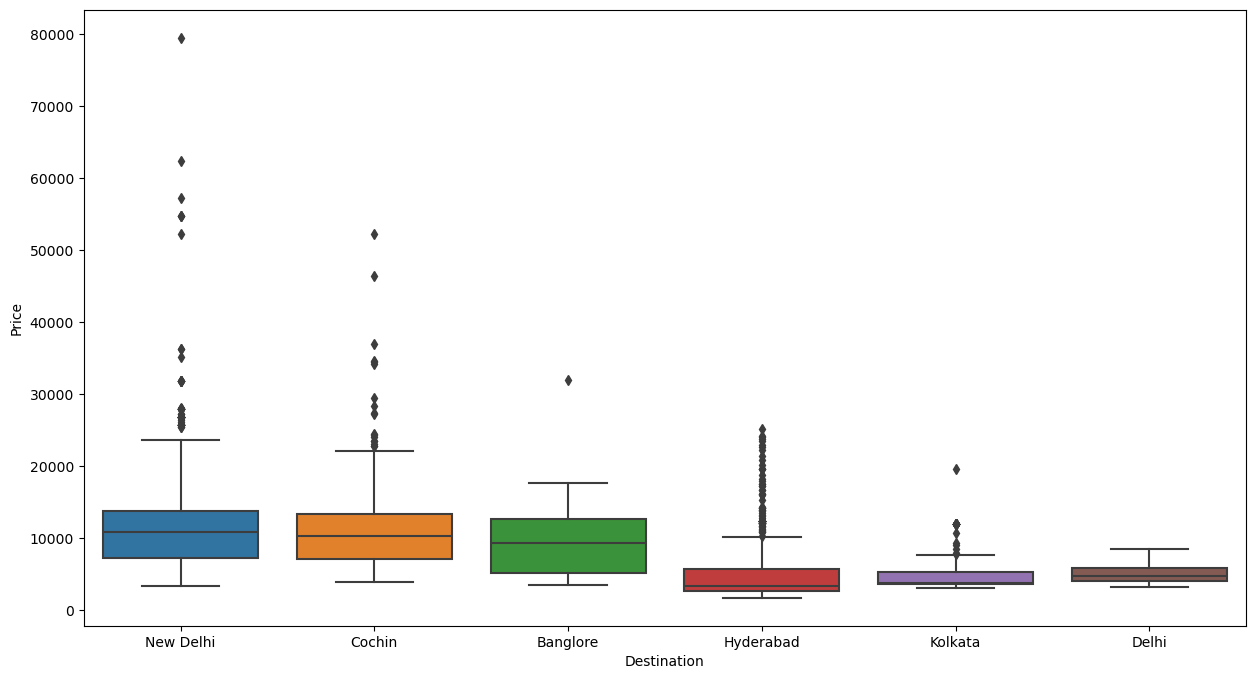

In [60]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))

In [61]:
#encoding of destination column
destination=pd.get_dummies(categorical['Destination'],drop_first=True)
destination.head()

,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,False,False,False,False,False,True
1,True,False,False,False,False,False
2,False,True,False,False,False,False
3,True,False,False,False,False,False
4,False,False,False,False,False,True


In [62]:
# now work on route column
categorical['Route'].value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

In [63]:
categorical['Route1']=categorical['Route'].str.split('→').str[0]
categorical['Route2']=categorical['Route'].str.split('→').str[1]
categorical['Route3']=categorical['Route'].str.split('→').str[2]
categorical['Route4']=categorical['Route'].str.split('→').str[3]
categorical['Route5']=categorical['Route'].str.split('→').str[4]

In [64]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [65]:
drop_col(categorical,'Route')

In [66]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route1                 0
Route2                 0
Route3              3491
Route4              9116
Route5             10636
dtype: int64

In [67]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [68]:
for i in ['Route3', 'Route4', 'Route5']:
    categorical[i].fillna('None',inplace=True)

In [69]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

In [70]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route1 has total 5 categories
Route2 has total 45 categories
Route3 has total 30 categories
Route4 has total 14 categories
Route5 has total 6 categories


In [71]:
px.histogram(data_frame=df , x = "Airline",y='Price')

In [72]:
# Applying label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [73]:
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [74]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [75]:
drop_col(categorical,'Additional_Info')

In [76]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [77]:
# Encoding Total stops
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [78]:
categorical['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [79]:
drop_col(categorical,'Source')
drop_col(categorical,'Destination')
drop_col(categorical,'Airline')

Model

In [80]:
final_df=pd.concat([categorical,Airline,source,destination,df[continuous_col]],axis=1)

In [81]:
final_df.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,journey_Day,journey_Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0,0,13,29,13,5,False,False,True,False,...,True,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,True,False,False,False,...,False,7662,1,5,5,50,13,15,7,25
2,2,3,32,4,5,5,False,False,False,True,...,False,13882,9,6,9,25,4,25,19,0
3,1,2,34,3,13,5,False,False,True,False,...,False,6218,12,5,18,5,23,30,5,25
4,1,0,34,8,13,5,False,False,True,False,...,True,13302,1,3,16,50,21,35,4,45


In [82]:
pd.set_option('display.max_columns',35)
final_df.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,...,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_Day,journey_Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0,0,13,29,13,5,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,True,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,7662,1,5,5,50,13,15,7,25
2,2,3,32,4,5,5,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,13882,9,6,9,25,4,25,19,0
3,1,2,34,3,13,5,False,False,True,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,6218,12,5,18,5,23,30,5,25
4,1,0,34,8,13,5,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,13302,1,3,16,50,21,35,4,45


In [85]:
def plot(data,col):
  #  fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col])
  #  sns.boxplot(data[col],ax=ax2)

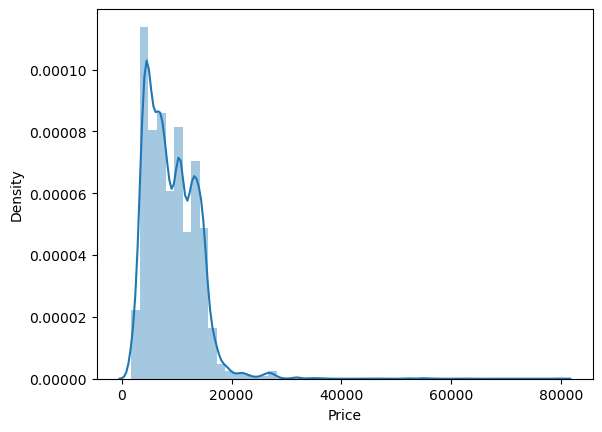

In [86]:
plot(final_df,'Price')

In [87]:
final_df['Price']=np.where(final_df['Price']>=35000,final_df['Price'].median(),final_df['Price'])

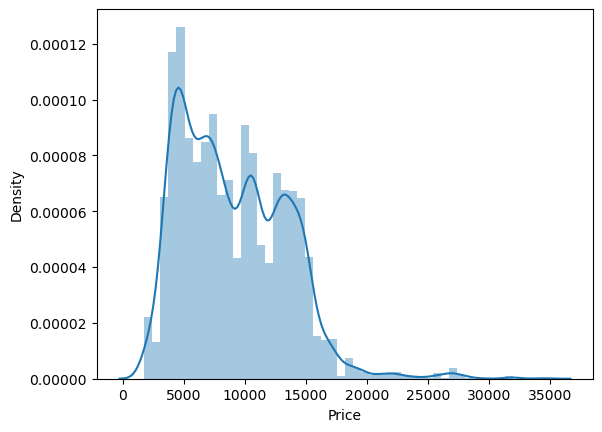

In [88]:
plot(final_df,'Price')

In [89]:
X=final_df.drop('Price',axis=1)
y=df['Price']

In [90]:
from sklearn.feature_selection import mutual_info_classif

In [198]:
mutual_info_classif(X,y)

array([2.15074754, 2.38362256, 1.63569937, 0.99047678, 2.03909609,
       0.7750768 , 0.084974  , 0.68995555, 0.92832766, 0.        ,
       0.43588099, 0.00594897, 0.26481749, 0.0082686 , 0.21697462,
       0.0060882 , 0.16085061, 1.54073042, 0.8935369 , 0.29047447,
       1.53349497, 0.40051413, 0.2939947 , 0.16854823, 0.28221613,
       0.73729122, 1.69272382, 1.14799665, 0.80325638, 1.17511799,
       0.95089389, 0.90447796, 0.90869929])

In [199]:
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,2.166783
Route1,2.336637
Route2,1.657498
Route3,1.014900
Route4,1.950670
Air India,0.782422
GoAir,0.084600
IndiGo,0.681608
Jet Airways,0.912563
Jet Airways Business,0.026420


In [91]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

NameError: name 'imp' is not defined

In [92]:
# spiliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)

In [93]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.distplot(y_test-predictions) 

Model is: RandomForestRegressor()
Training score: 0.9517289242965487
Predictions are: [ 8499.73333333 17211.88       13927.19766667 ...  3855.36
  5745.49       10550.25166667]


r2 score is: 0.8398064364882917
MAE:1087.6450324886987
MSE:3084635.605262292
RMSE:1756.3130715400066


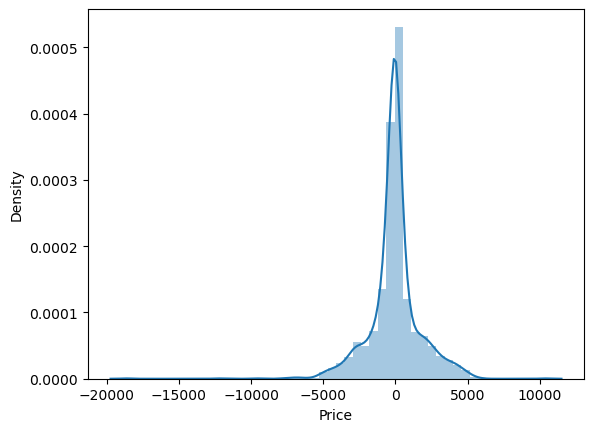

In [95]:
predict(RandomForestRegressor())

Model is: LogisticRegression()
Training score: 0.35927442949093036
Predictions are: [14781 17024 10844 ...  4226  5054 10262]


r2 score is: 0.32203676764731237
MAE:1914.4496958352831
MSE:13054641.395882078
RMSE:3613.1207281077777


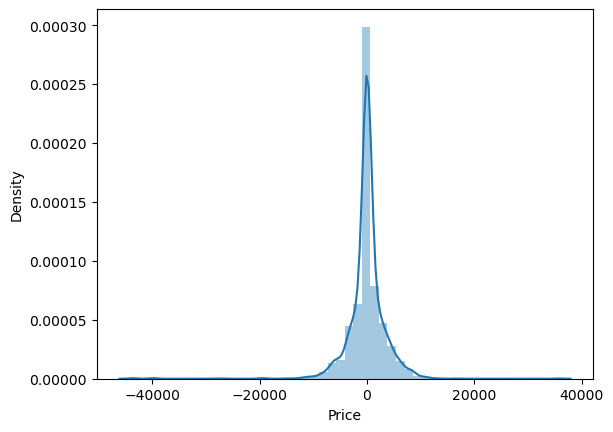

In [96]:
predict(LogisticRegression())